In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import copy
import random
import os
import sys
import warnings
import gym
import torch

sys.path.insert(0, 'src/')
from train import train
from test import test
from draw_plot import draw_plot
from TD3 import TD3

%matplotlib inline
warnings.filterwarnings('ignore')

# BipedalWalker problem



### Training parameters

In [2]:
environment_name = "BipedalWalker-v3"
gamma = 0.99                      # discount for future rewards
batch_size = 100                  # num of transitions sampled from replay buffer
learning_rate = 0.001
exploration_noise = 0.1
polyak = 0.955                    # target policy update parameter (1-tau)
policy_noise = 0.2                # target policy smoothing noise
noise_clip = 0.5
policy_delay = 2                  # delayed policy updates parameter
episodes = 1500
max_timesteps = 2000              # max timesteps in one episode
logs_directory = "./logs"
save_directory = "./models"
filename = "TD3_" + environment_name

Episode: 10, Average Reward: -147.18591703013993
Episode: 20, Average Reward: -109.18647462639058
Episode: 30, Average Reward: -103.12914620203915
Episode: 40, Average Reward: -108.18152818314324
Episode: 50, Average Reward: -125.06305187671066
Episode: 60, Average Reward: -118.10142442789527
Episode: 70, Average Reward: -117.91303884506067
Episode: 80, Average Reward: -107.81797030026829
Episode: 90, Average Reward: -104.52361531380397
Episode: 100, Average Reward: -102.5215291195374
Episode: 110, Average Reward: -89.23373485517075
Episode: 120, Average Reward: -87.83394329209733
Episode: 130, Average Reward: -79.41724804963744
Episode: 140, Average Reward: -96.82626013525596
Episode: 150, Average Reward: -105.82751352980252
Episode: 160, Average Reward: -77.80885737940577
Episode: 170, Average Reward: -81.58545594608182
Episode: 180, Average Reward: -57.25763513021765
Episode: 190, Average Reward: -67.27931140075617
Episode: 200, Average Reward: -40.83504808870772
Episode: 210, Avera

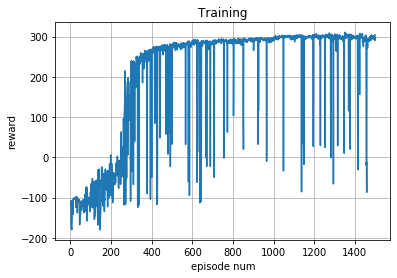

In [3]:
environment = gym.make(environment_name)
state_dim = environment.observation_space.shape[0]
action_dim = environment.action_space.shape[0]

seed = 0
environment.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

model = TD3(learning_rate, state_dim, action_dim)

train_rewards = train(environment, model,
                      gamma, batch_size, exploration_noise,
                      polyak, policy_noise, noise_clip, policy_delay,
                      episodes, max_timesteps,
                      logs_directory, save_directory, filename)
draw_plot(train_rewards, "Training")

### Test parameters

In [19]:
launch_number = 100
model_path = "./models/TD3_BipedalWalker-v3"

Episode: 10, Average Reward: 297.91704304376884
Episode: 20, Average Reward: 298.15690192564347
Episode: 30, Average Reward: 297.3719599992258
Episode: 40, Average Reward: 297.77842118785077
Episode: 50, Average Reward: 297.78307976682134
Episode: 60, Average Reward: 297.6342472635032
Episode: 70, Average Reward: 297.43795879840417
Episode: 80, Average Reward: 297.46836712064584
Episode: 90, Average Reward: 297.3138992381902
Episode: 100, Average Reward: 297.7228200281992



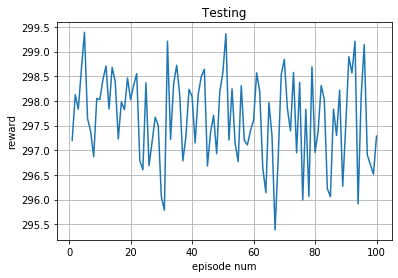

In [20]:
model = TD3(learning_rate, state_dim, action_dim)
model.load(model_path, True)

test_rewards = test(model, environment, 
                    max_timesteps, launch_number, logs_directory)
draw_plot(test_rewards, "Testing")